In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from scipy import stats

In [3]:
df = pd.read_csv("C:\\Users\Omkaar Sampigeadi\Downloads\DataNova Datasets\Dyt-desktop.csv", sep=';')

In [4]:

# Create more manageable data - replace 'NULL' with NaN
df = df.replace('NULL', np.nan)

# Convert numeric columns to appropriate data types
numeric_cols = [col for col in df.columns if col not in ['Gender', 'Nativelang', 'Otherlang', 'Dyslexia']]
df[numeric_cols] = df[numeric_cols].apply(pd.to_numeric, errors='coerce')

# Create performance metrics
accuracy_cols = [col for col in df.columns if 'Accuracy' in col]
missrate_cols = [col for col in df.columns if 'Missrate' in col]
hits_cols = [col for col in df.columns if 'Hits' in col]
misses_cols = [col for col in df.columns if 'Misses' in col]
clicks_cols = [col for col in df.columns if 'Clicks' in col]

# Calculate average performance metrics
df['Mean_Accuracy'] = df[accuracy_cols].mean(axis=1)
df['Mean_Missrate'] = df[missrate_cols].mean(axis=1)
df['Total_Hits'] = df[hits_cols].sum(axis=1)
df['Total_Misses'] = df[misses_cols].sum(axis=1)
df['Total_Clicks'] = df[clicks_cols].sum(axis=1)
df['Overall_Accuracy'] = df['Total_Hits'] / df['Total_Clicks']

# Group students by dyslexia status
dyslexic = df.loc[df['Dyslexia'] == 'Yes']
non_dyslexic = df.loc[df['Dyslexia'] == 'No']

# Analyze performance gaps by task by measuring accuracy
task_analysis = []
for i in range(1, 33):
    acc_col = f'Accuracy{i}'
    if acc_col in df.columns:
        dys_acc = dyslexic[acc_col].dropna()
        non_dys_acc = non_dyslexic[acc_col].dropna()

        if len(dys_acc) >= 3 and len(non_dys_acc) >= 3:
            dys_mean = dys_acc.mean()
            non_mean = non_dys_acc.mean()

            t_stat, p_val = stats.ttest_ind(dys_acc, non_dys_acc, equal_var=False)

            task_analysis.append({
                'Task': i,
                'Dyslexic_Mean': dys_mean,
                'Non_Dyslexic_Mean': non_mean,
                'Gap': non_mean - dys_mean,
                'p_value': p_val,
                'Significant': p_val < 0.05
            })

task_df = pd.DataFrame(task_analysis)

C:\Users\Omkaar Sampigeadi\AppData\Local\Temp\ipykernel_26320\2805562184.py:16: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Mean_Accuracy'] = df[accuracy_cols].mean(axis=1)
C:\Users\Omkaar Sampigeadi\AppData\Local\Temp\ipykernel_26320\2805562184.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Mean_Missrate'] = df[missrate_cols].mean(axis=1)
C:\Users\Omkaar Sampigeadi\AppData\Local\Temp\ipykernel_26320\2805562184.py:18: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `fram

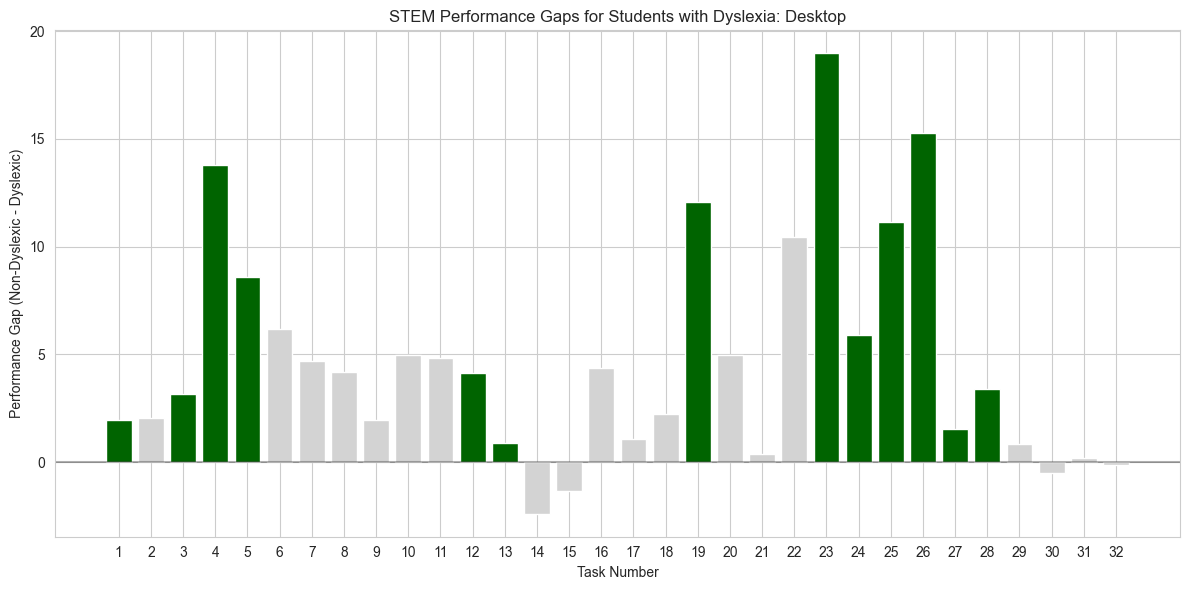

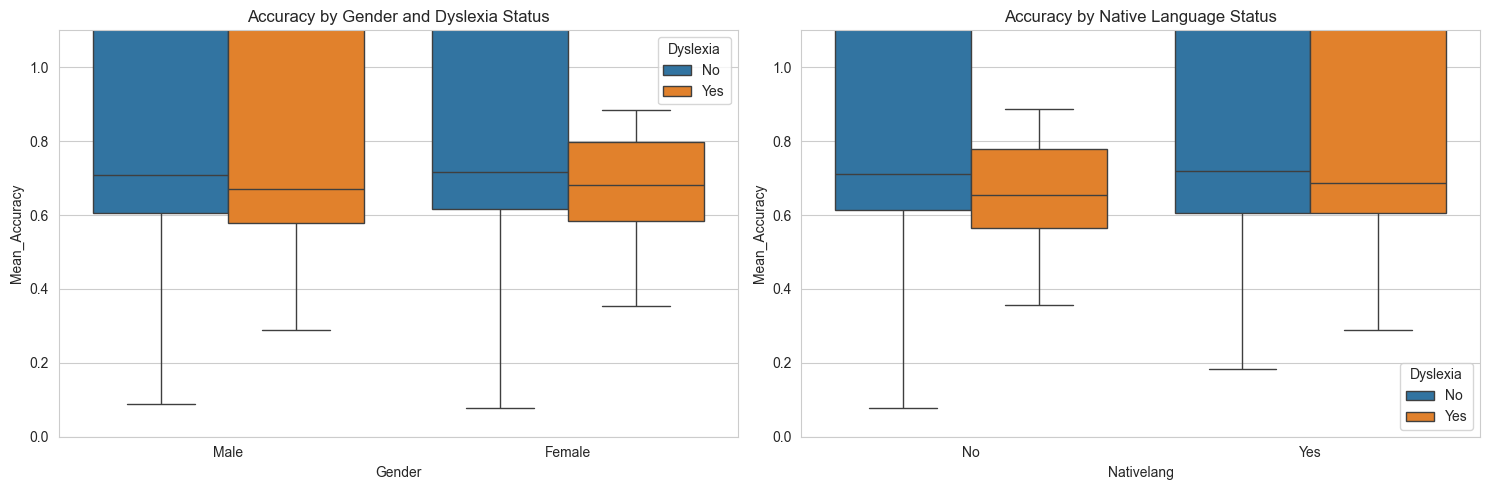

In [32]:

# Visualize performance gaps
plt.figure(figsize=(12, 6))
sns.set_style('whitegrid')

# Create bar chart of performance gaps by task
plt.bar(
    task_df['Task'].astype(str),
    task_df['Gap'],
    color=[('darkgreen' if sig else 'lightgray') for sig in task_df['Significant']]
)
plt.axhline(y=0, color='black', linestyle='-', alpha=0.3)
plt.xlabel('Task Number')
plt.ylabel('Performance Gap (Non-Dyslexic - Dyslexic)')
plt.title('STEM Performance Gaps for Students with Dyslexia: Desktop')
plt.tight_layout()

# Demographic analysis
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
sns.boxplot(x='Gender', y='Mean_Accuracy', hue='Dyslexia', data=df)
plt.title('Accuracy by Gender and Dyslexia Status')
plt.ylim(0, 1.1)

plt.subplot(1, 2, 2)
sns.boxplot(x='Nativelang', y='Mean_Accuracy', hue='Dyslexia', data=df)
plt.title('Accuracy by Native Language Status')
plt.ylim(0, 1.1)

plt.tight_layout()
plt.show()

C:\Users\Omkaar Sampigeadi\AppData\Local\Temp\ipykernel_26320\1184080118.py:1: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  df['Task_Sequence_Performace'] = df[accuracy_cols].T.rolling(window=5).mean().T.mean(axis=1)


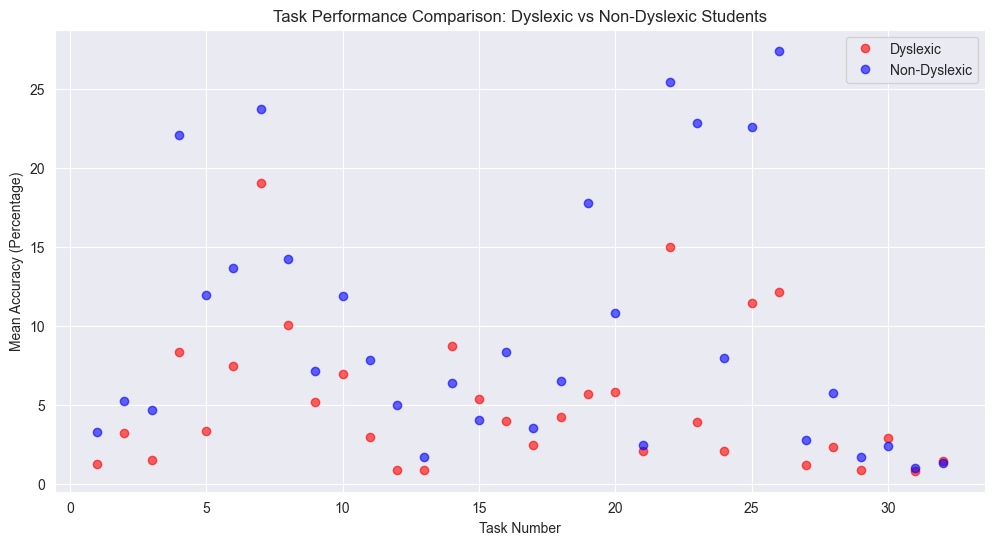

In [6]:
df['Task_Sequence_Performace'] = df[accuracy_cols].T.rolling(window=5).mean().T.mean(axis=1)
plt.figure(figsize=(12, 6))
for task in range(1,33):
    acc_col = f'Accuracy{task}'
    if acc_col in df.columns:
        dys_mean = dyslexic[acc_col].mean()
        non_dys_mean = non_dyslexic[acc_col].mean()
        plt.plot(task, dys_mean, 'ro', alpha=0.6, label='Dyslexic' if task == 1 else "")
        plt.plot(task, non_dys_mean, 'bo', alpha=0.6, label='Non-Dyslexic' if task == 1 else "")
plt.xlabel('Task Number')
plt.ylabel('Mean Accuracy (Percentage)')
plt.title('Task Performance Comparison: Dyslexic vs Non-Dyslexic Students')
plt.legend()
plt.show()